In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")  # or encoding="cp1252"
print(df.sample(5))


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
1492        10110               29      59.37               15  1721.73   
412         10321               24     100.00               15  2984.88   
24          10403               24     100.00                7  2434.56   
642         10301               47     100.00                7  7488.04   
1003        10293               24     100.00                4  2819.28   

           ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
1492  3/18/2003 0:00  Shipped       1         3     2003  ...   
412   11/4/2004 0:00  Shipped       4        11     2004  ...   
24     4/8/2005 0:00  Shipped       2         4     2005  ...   
642   10/5/2003 0:00  Shipped       4        10     2003  ...   
1003   9/9/2004 0:00  Shipped       3         9     2004  ...   

                             ADDRESSLINE1  ADDRESSLINE2         CITY STATE  \
1492                    Fauntleroy Circus           NaN   Manchester   NaN   
41

###Phase 3: Statistical Analysis

In [4]:
df[['SALES', 'QUANTITYORDERED', 'MSRP']].describe()

,SALES,QUANTITYORDERED,MSRP
count,2823.000000,2823.000000,2823.000000
mean,3553.889072,35.092809,100.715551
std,1841.865106,9.741443,40.187912
min,482.130000,6.000000,33.000000
25%,2203.430000,27.000000,68.000000
50%,3184.800000,35.000000,99.000000
75%,4508.000000,43.000000,124.000000
max,14082.800000,97.000000,214.000000


In [5]:
df['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [6]:
df['SALES'].agg(['skew', 'kurtosis'])

skew        1.161076
kurtosis    1.792676
Name: SALES, dtype: float64

<Axes: xlabel='SALES', ylabel='Count'>

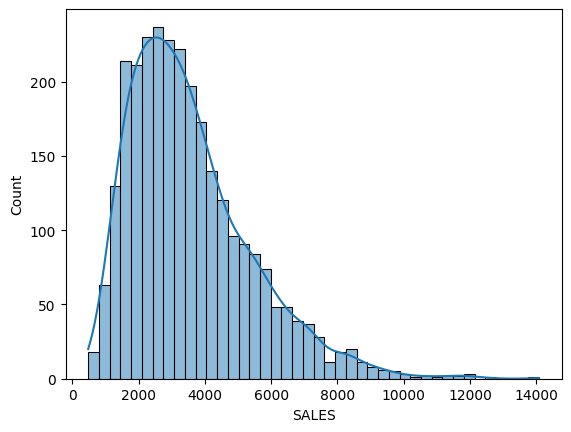

In [7]:
import seaborn as sns


sns.histplot(df['SALES'], kde=True)

In [10]:
#Correlation Matrix for Numerical Variables


numeric_cols = ['SALES', 'QUANTITYORDERED', 'MSRP', 'PRICEEACH']
corr_matrix = df[numeric_cols].corr()

Text(0.5, 1.0, 'Correlation Matrix')

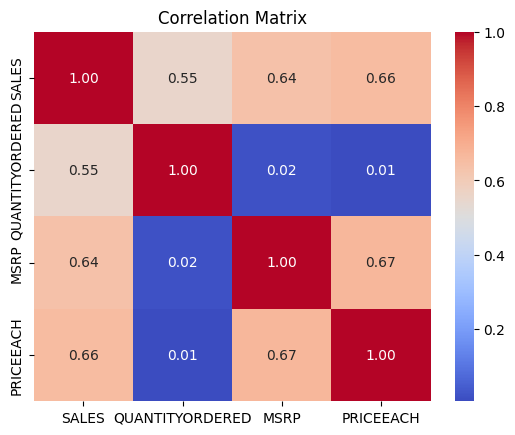

In [11]:
import matplotlib.pyplot as plt


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


plt.title('Correlation Matrix')

In [21]:
#Hypothesis Testing: Weekend vs. Weekday Sales (T-test)

# Create the 'Is_Weekend' feature
import pandas as pd
from scipy import stats
from datetime import timedelta # Needed if you are using the full RFM/Snapshot logic

# 💡 FIX: Convert the ORDERDATE column to datetime type
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# --- Your Original Code (Now Fixed) ---
# Hypothesis Testing: Weekend vs. Weekday Sales (T-test)

# Create the 'Is_Weekend' feature
df['DAY_OF_WEEK'] = df['ORDERDATE'].dt.dayofweek # Monday=0, Sunday=6
df['Is_Weekend'] = df['DAY_OF_WEEK'].isin([5, 6]) # 5=Saturday, 6=Sunday

# Separate the SALES data into two groups
weekend_sales = df[df['Is_Weekend']]['SALES']
weekday_sales = df[~df['Is_Weekend']]['SALES']

# Perform the independent two-sample T-test
t_stat, p_value = stats.ttest_ind(weekend_sales, weekday_sales, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: -0.9934
P-Value: 0.3213


In [19]:
import scipy


In [23]:
#B. Perform the Two-Sample Independent T-Test

from scipy import stats

# Perform the independent two-sample T-test
# H0: Mean weekend sales = Mean weekday sales
# Ha: Mean weekend sales != Mean weekday sales
t_stat, p_value = stats.ttest_ind(weekend_sales, weekday_sales, equal_var=False) # Use False for Welch's T-test, safer if variances are unequal

print(f"\nT-Test Results (Weekend vs. Weekday Sales):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation: If p-value < 0.05, you reject H0 (means are significantly different)
if p_value < 0.05:
    print("Conclusion: Reject H0. There is a statistically significant difference in sales.")
else:
    print("Conclusion: Fail to Reject H0. No significant difference found.")


T-Test Results (Weekend vs. Weekday Sales):
T-Statistic: -0.9934
P-Value: 0.3213
Conclusion: Fail to Reject H0. No significant difference found.


In [33]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 1. Ensure ORDERDATE is the correct datetime format (Crucial!)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# 2. Set ORDERDATE as the index and resample ('MS' means Month Start)
# We sum the 'SALES' for all orders that occurred within that month.
monthly_sales = df.set_index('ORDERDATE')['SALES'].resample('MS').sum()

print("Monthly Sales Series created and ready for decomposition.")

Monthly Sales Series created and ready for decomposition.


In [34]:
# 'additive' model is generally a good starting point (components add up to the total sales)
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12) 

# --- Output the Key Components ---

# 1. Trend: The long-term direction of sales (is it generally rising or falling?)
print("\nTrend (First 5 months):")
print(decomposition.trend.head())

# 2. Seasonality: The repeating pattern (e.g., peak in October, low in February)
print("\nSeasonality (First 12 months):")
print(decomposition.seasonal.head(12))

# 3. Residual: The random noise left over after trend and seasonality are removed
print("\nResiduals (First 5 months):")
print(decomposition.resid.head())


Trend (First 5 months):
ORDERDATE
2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
Freq: MS, Name: trend, dtype: float64

Seasonality (First 12 months):
ORDERDATE
2003-01-01    -28600.271771
2003-02-01    -50554.169271
2003-03-01   -169592.865938
2003-04-01   -170903.927188
2003-05-01   -105440.475104
2003-06-01    -99293.668021
2003-07-01    -87223.155104
2003-08-01    -23904.601146
2003-09-01    -69887.498021
2003-10-01    192945.860313
2003-11-01    685005.841771
2003-12-01    -72551.070521
Freq: MS, Name: seasonal, dtype: float64

Residuals (First 5 months):
ORDERDATE
2003-01-01   NaN
2003-02-01   NaN
2003-03-01   NaN
2003-04-01   NaN
2003-05-01   NaN
Freq: MS, Name: resid, dtype: float64


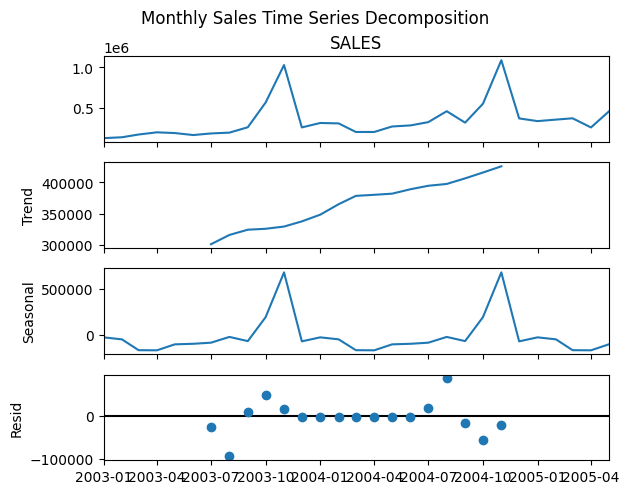

In [26]:
#ANOVA/Chi-square: Country Impact on Order Value

# Select only the top 5 countries by order count
top_countries = df['COUNTRY'].value_counts().nlargest(5).index
df_anova = df[df['COUNTRY'].isin(top_countries)]

# Create sales lists for each country
country_groups = [df_anova['SALES'][df_anova['COUNTRY'] == country] for country in top_countries]

In [27]:
#Perform One-Way ANOVA Test

# Perform the One-Way ANOVA test
# H0: Mean Sales in all top countries are equal
# Ha: At least one country's Mean Sales is different
f_stat, p_value = stats.f_oneway(*country_groups)

print(f"\nANOVA Results (Sales by Top 5 Countries):")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation: If p-value < 0.05, you reject H0 (Country has a significant impact on average sales)
if p_value < 0.05:
    print("Conclusion: Reject H0. The average sales value differs significantly by Country.")
else:
    print("Conclusion: Fail to Reject H0. No significant difference found.")


ANOVA Results (Sales by Top 5 Countries):
F-Statistic: 1.0923
P-Value: 0.3587
Conclusion: Fail to Reject H0. No significant difference found.


In [ ]:
###Time Series Decomposition for Seasonality

In [29]:
pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -----------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
#. Prepare Time Series Data
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate total sales by month
monthly_sales = df.set_index('ORDERDATE')['SALES'].resample('MS').sum()

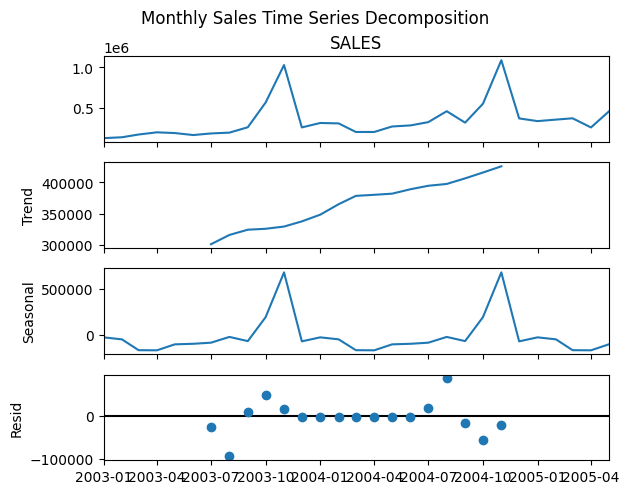

In [32]:
##Decompose the Series

# The period parameter must be set: e.g., 12 for monthly data with annual seasonality.
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12) 

# Plot the decomposition
# A visual check is key here.
decomposition.plot()
plt.suptitle('Monthly Sales Time Series Decomposition', y=1.02)
plt.show()

# Access the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid